### Section A

In [34]:
import os
import geopandas as gpd
import numpy as np
import pandas as pd
import descartes
from shapely.geometry import LineString, Point, Polygon
from geopandas.tools import reverse_geocode
import geopandas as gpd
from geopandas.tools.geocoding import geocode
import matplotlib.pyplot as plt

Task 1- reading data from csv file

In [2]:
file_path = r'C:\Users\Dell\OneDrive - Technion\טכניון\סמסטר ז\סדנא בפיתוח ממג\code\data\travelTimes_2015_Helsinki.csv'
col_list = ["from_x", "from_y", "to_x", "to_y"]
data = pd.read_csv(file_path, usecols=col_list)
data.head()


,from_x,from_y,to_x,to_y
0,24.970438,60.311917,24.856034,60.399941
1,24.970438,60.311917,24.860568,60.400014
2,24.970438,60.311917,24.865102,60.400086
3,24.970438,60.311917,24.869636,60.400159
4,24.970438,60.311917,24.842582,60.397478


Task 2- create lists




In [3]:
orig_points = []
dest_points = []


Task 3- populate lists with Shapely Points




In [4]:
for index, row in data.iterrows() :
    orig_points.append(Point(row['from_x'], row['from_y']))
    dest_points.append(Point(row['to_x'], row['to_y']))
print(orig_points[1].x)
print(orig_points[1].y)

24.9704379
60.3119173


Task 4- create Shapely line objects and printing average length


In [5]:
lines = []

for i in range(len(orig_points)) :
    lines.append(LineString([orig_points[i], dest_points[i]]))

avg_line = sum([line.length for line in lines]) / len(lines)
print('average length is: ',avg_line)

average length is:  0.21502224823227184


### Section B
#### part 1:

reading data from csv file


In [6]:
file_path = r'C:\Users\Dell\OneDrive - Technion\טכניון\סמסטר ז\סדנא בפיתוח ממג\code\data\some_posts.csv'
df = pd.read_csv(file_path)


creating points from the data and insert to dataframe

In [15]:
# for index, row in df.iterrows() :
#     geometry = Point(row['lat'], row['lon'])

geometry = gpd.points_from_xy(df.lon,df.lat)
df['geometry'] = geometry
print(df.shape)
df.head()


(81379, 5)


,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (31.484633302 -24.980792492)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (31.508905612 -25.499224667)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (30.930866066 -24.342578456)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (31.519718439 -24.85461393)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (31.520835558 -24.921068894)


Convert DataFrame into a GeoDataFrame and export to shapefile

In [16]:
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")
gdf.crs

# save to shp
gdf.to_file("Kruger_posts.shp")

get map and plot points

0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
                 ...           
172                      Serbia
173                  Montenegro
174                      Kosovo
175         Trinidad and Tobago
176                    S. Sudan
Name: name, Length: 177, dtype: object


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

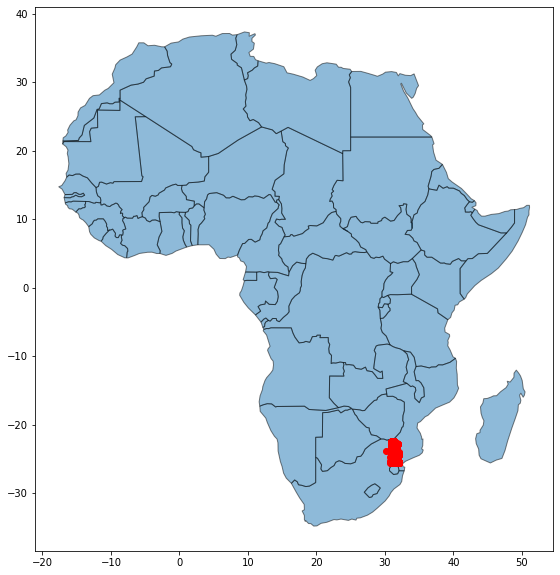

In [41]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.to_crs(epsg=4326)

# restrict to Africa.
ax = world[world.continent == 'Africa'].plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
# restrict to South Africa.
# ax = world[world.name == 'South Africa'].plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')
plt.show